In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/DSA/Python Básico/Cap 13 - Projeto 2/dataset.csv')

In [ ]:
dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


In [ ]:
dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de negócio 1
### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [ ]:
# retorna dados onde categoria é office supplies
dados_os = dados[dados['Categoria'] == 'Office Supplies']

In [ ]:
# ja com a categoria especifica, agrupa por cidade e retorna o valor de cada venda
dados_os_total = dados_os.groupby('Cidade')['Valor_Venda'].sum()

In [ ]:
# mostra a cidade com maior valor
cidade_top = dados_os_total.idxmax()
print("Cidade com maior numero de vendas:", cidade_top)

Cidade com maior numero de vendas: New York City


In [ ]:
# mostra os valores
dados_os_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [ ]:
dados_dp = dados.groupby('Data_Pedido')['Valor_Venda'].sum() # sum = total de vendas (por data do pedido)

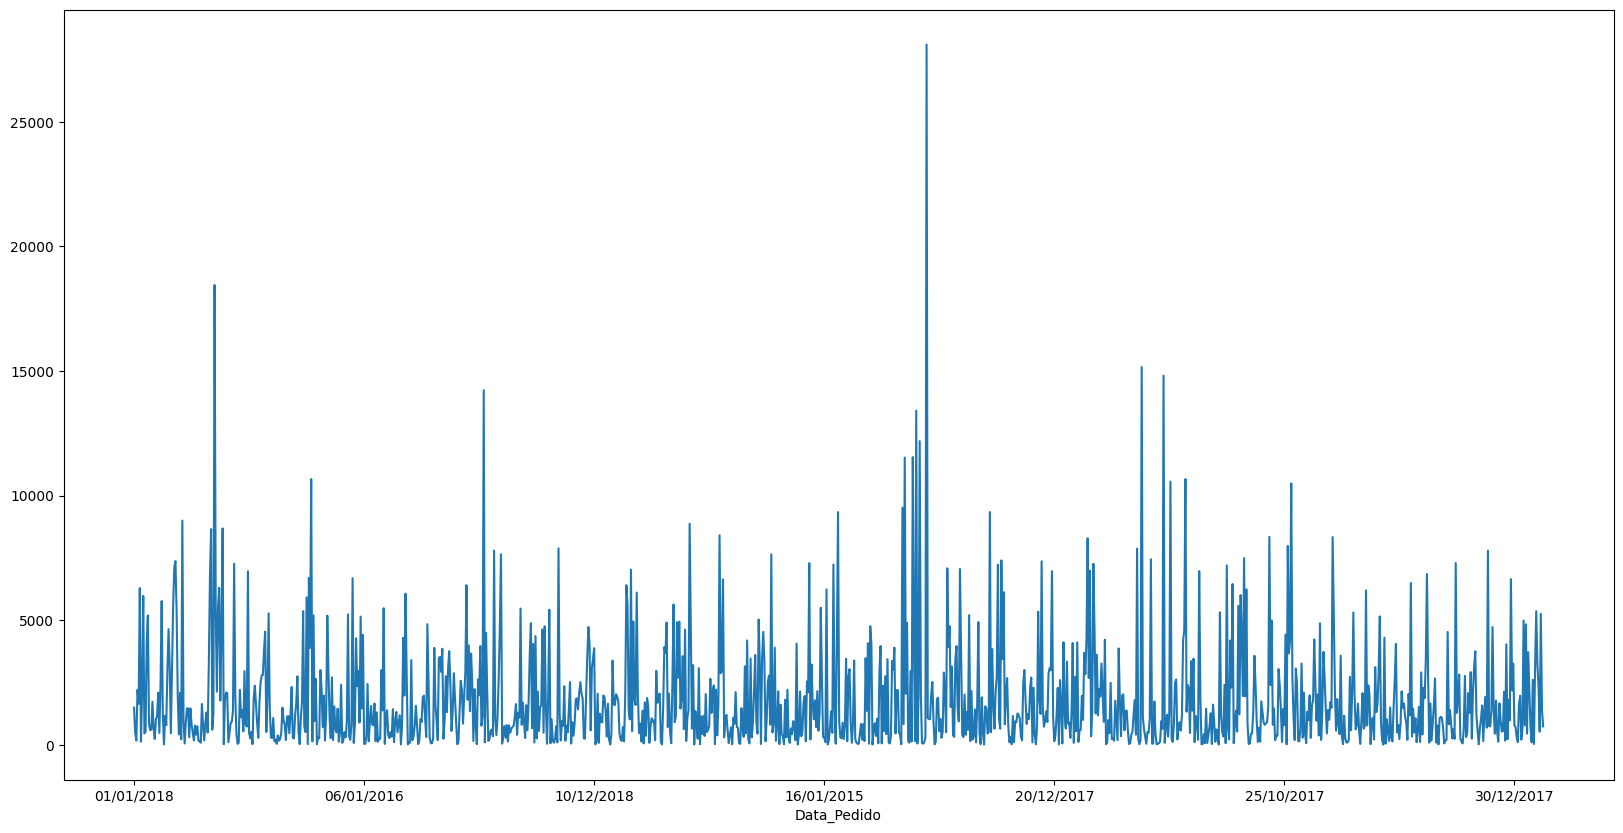

In [ ]:
plt.figure(figsize=(20,10))
dados_dp.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [ ]:
# soma o total de vendas e agrupa por estado, adicionando um indice pra cada
dados_es = dados.groupby('Estado')['Valor_Venda'].sum().reset_index()

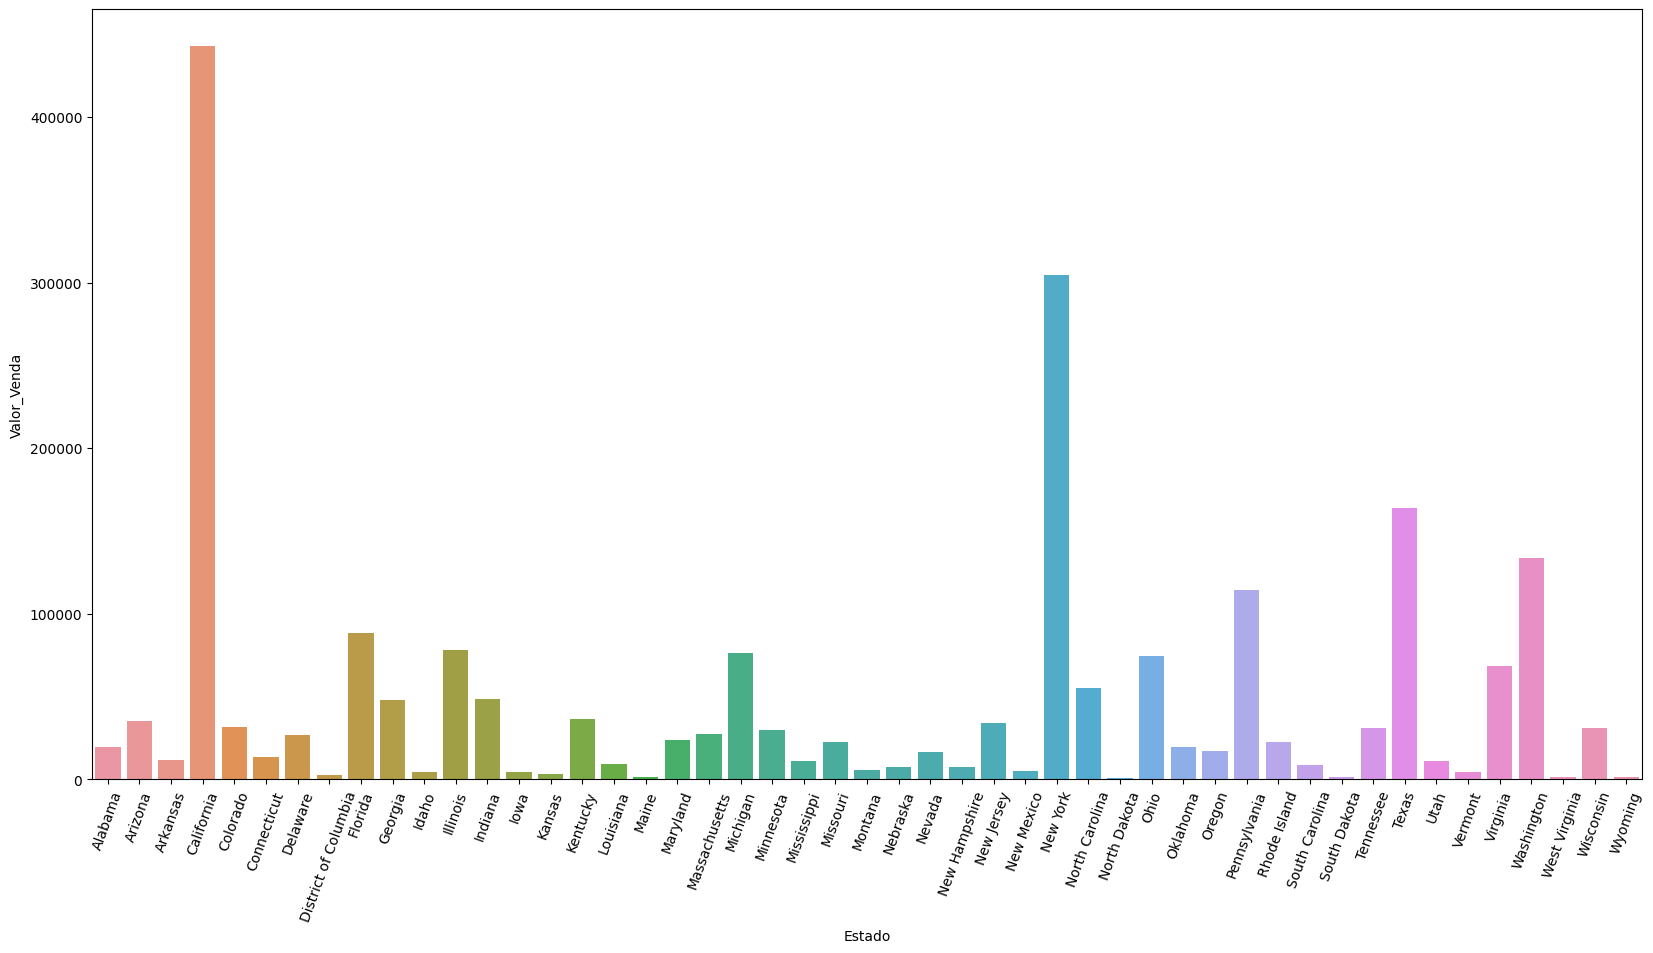

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = dados_es,y = 'Valor_Venda', x = 'Estado')
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [ ]:
# agrupa por cidade e valor de venda (que é somado), adiciona um index para as cidades e lista os 10 primeiros
dados_cd = dados.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

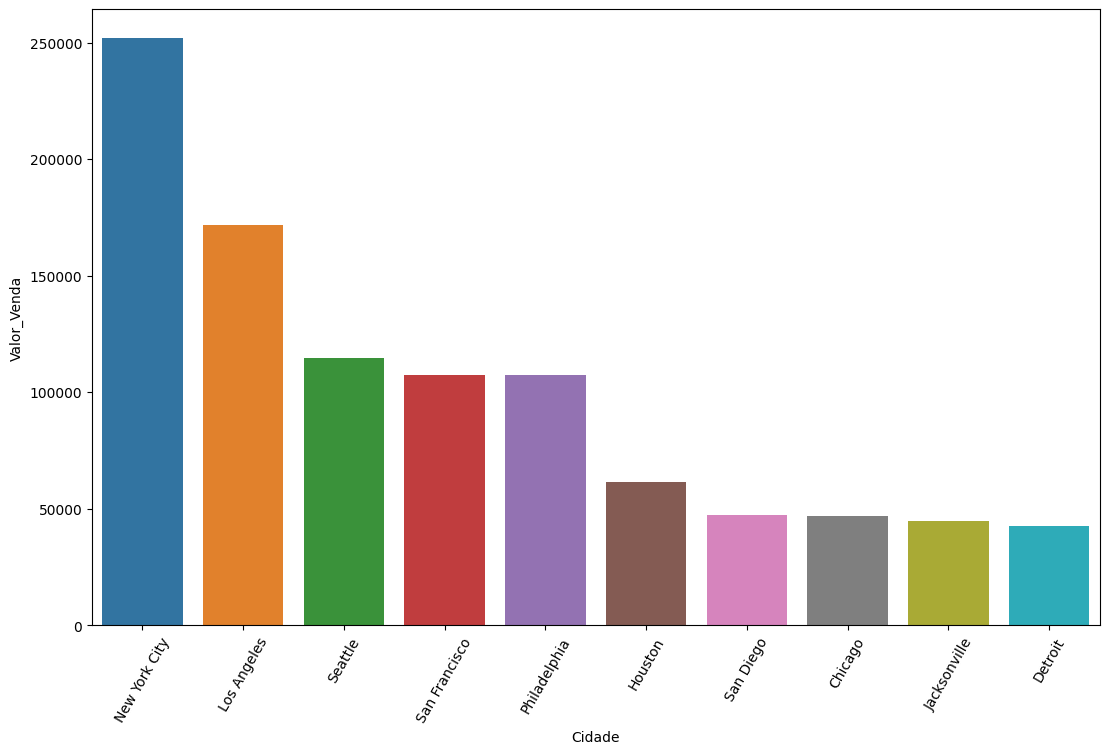

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(data = dados_cd, x = 'Cidade', y = 'Valor_Venda')
plt.xticks(rotation = 60)
plt.show()